# Visualizing High-Dimensional Data with Python

Instructor: [Jeroen Janssens](https://jeroenjanssens.com)

## PCA

In [1]:
import pandas as pd

from plotnine import *

### Load data

In [21]:
df = pd.read_pickle("df.pkl")

df.head()

,0,1,2,target
0,-0.090842,9.789511,0.179554,no
1,-1.027056,-0.730191,9.172335,no
2,-0.195023,0.874054,10.277684,no
3,0.689075,11.366434,0.128793,no
4,-0.578139,-0.354435,9.247236,no


### Apply PCA using the scikit-learn API 

#### Step 1: Look up in which module the class resides

https://duckduckgo.com/?q=scikit-learn+pca

***PCA appears to be the decomposition submodule***

#### Step 2: Import the appropriate class

In [4]:
from sklearn.decomposition import PCA

#### Step 3: Instantiate object with parameters

In [5]:
pca = PCA(n_components=3)

#### Step 4: Fit the model to the data

In [23]:
X = df.drop("target", axis=1) # Use only features

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### Step 5: Transform / Predict

In [22]:
X_mapped = pca.transform(X)

X_mapped[:5]

array([[ 7.88618975, -1.40081434, -0.11866155],
       [-5.05170095, -6.25729881,  1.07977873],
       [-4.56890556, -6.46140239, -0.97276305],
       [ 8.96848845, -0.94768199, -1.43046716],
       [-4.91180584, -5.9938883 ,  0.57049193]])

### Visualise result

#### Add mapped / projected data to original DataFrame

In [24]:
df_mapped = pd.DataFrame(X_mapped, columns=[f"pc{x+1}" for x in range(X_mapped.shape[1])])
df = pd.concat([df, df_mapped], axis=1)

df.tail()

,0,1,2,target,pc1,pc2,pc3
55,-1.560047,0.023601,8.830347,no,-4.118510,-6.564953,1.140946
56,8.427480,0.556634,0.797079,no,-2.215375,6.085930,0.191502
57,-0.058178,9.954531,-0.566056,no,8.401704,-0.946991,0.216781
58,10.686285,1.252133,-1.206411,no,-1.223876,8.988849,-0.244251
59,0.000000,0.000000,0.000000,yes,0.071335,-0.021449,5.617226


#### We choose the first two components for visualisation

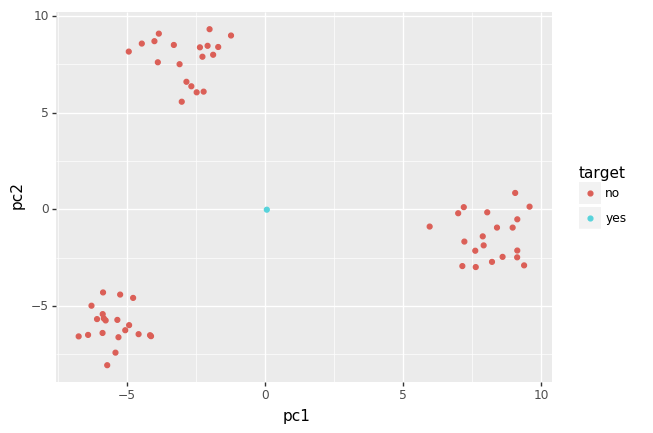

<ggplot: (8745327573233)>

In [25]:
ggplot(df, aes("pc1", "pc2", color="target")) + geom_point()

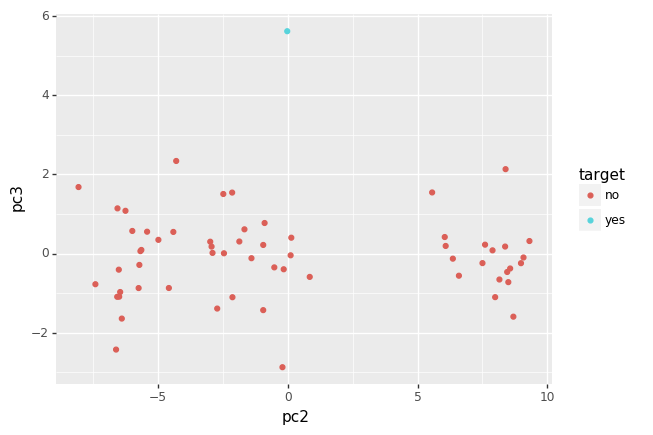

<ggplot: (8745327573029)>

In [26]:
ggplot(df, aes("pc2", "pc3", color="target")) + geom_point()

#### PCA ensures that the first PC contains the most variance, the second PC the second-most variance, and so forth. The reduction of dimensions is simply choosing to use the first *n* PCs.

In [12]:
pca.explained_variance_

array([36.08000322, 33.588707  ,  1.53629274])

In [13]:
df.var()

0      24.132388
1      24.423477
2      22.649138
pc1    36.080003
pc2    33.588707
pc3     1.536293
dtype: float64

In [14]:
df.iloc[:,:3].var().sum()

71.20500295904057

In [15]:
df.iloc[:,:3].cov()

,0,1,2
0,24.132388,-10.748498,-10.229725
1,-10.748498,24.423477,-12.249719
2,-10.229725,-12.249719,22.649138


In [16]:
df.iloc[:,3:].var().sum()

71.20500295904056

In [17]:
df.iloc[:,3:].cov()

,pc1,pc2,pc3
pc1,3.608000e+01,1.558184e-14,8.678557e-15
pc2,1.558184e-14,3.358871e+01,3.974222e-15
pc3,8.678557e-15,3.974222e-15,1.536293e+00


#### PCA for Machine Learning

A common strategy is the use the first *n* PCs such that 95% of the variance is maintained. 

In [18]:
pca.explained_variance_ratio_

array([0.50670601, 0.47171836, 0.02157563])

In [19]:
pca.explained_variance_ratio_.sum()

1.0

In [20]:
pca.explained_variance_ratio_.cumsum()

array([0.50670601, 0.97842437, 1.        ])

#### So, the first 2 PCs in this case.

Note:

* PCA is sensitive to scaling.
* PCA centers the data first.